# Importando Bibliotecas 



---


Iremos importar as bibliotecas necessárias para a análise exploratória de alguns dados eleitorais dos anos de 2018 e 2020

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

# Importando o dataset do perfil de eleitores Estado de SP em 2020



---

Estou importando uma base de dados dos eleitores aptos a voto no Estado de São Paulo

In [ ]:
eleitor_2020 = pd.read_csv('/content/drive/My Drive/perfil_eleitor_secao_ATUAL_SP.csv', ';', encoding= 'iso-8859-1')

# Conhecendo o dataset

---



Um exemplo de como é a base de dados dos eleitores

In [ ]:
eleitor_2020.sample(3)


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,NR_SECAO,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
14324359,10/10/2020,15:24:37,9999,SP,61816,ATIBAIA,-2,Não se aplica,16,399,2,MASCULINO,1,SOLTEIRO,2124,21 a 24 anos,6,ENSINO MÉDIO COMPLETO,2,1,0,0
1614321,10/10/2020,15:24:37,9999,SP,68314,PAULÍNIA,-2,Não se aplica,323,129,2,MASCULINO,5,VIÚVO,6064,60 a 64 anos,2,LÊ E ESCREVE,1,1,0,0
7208987,10/10/2020,15:24:37,9999,SP,61735,ARIRANHA,-2,Não se aplica,111,57,2,MASCULINO,3,CASADO,8084,80 a 84 anos,2,LÊ E ESCREVE,1,0,0,0


# Modelagem do Dataset

---



In [ ]:
eleitor_SCS_2020 = eleitor_2020[eleitor_2020['NM_MUNICIPIO'] == 'SÃO CAETANO DO SUL']

In [ ]:
eleitor_SCS_2020 = eleitor_SCS_2020.filter(items=['NR_ZONA','NR_SECAO','DS_GENERO',
                                                  'DS_ESTADO_CIVIL', 'DS_FAIXA_ETARIA',
                                                  'DS_GRAU_ESCOLARIDADE'])

In [ ]:
eleitor_SCS_2020.sample(3)

,NR_ZONA,NR_SECAO,DS_GENERO,DS_ESTADO_CIVIL,DS_FAIXA_ETARIA,DS_GRAU_ESCOLARIDADE
8383353,269,64,FEMININO,VIÚVO,60 a 64 anos,ENSINO FUNDAMENTAL COMPLETO
8680939,269,133,MASCULINO,SOLTEIRO,50 a 54 anos,ENSINO FUNDAMENTAL INCOMPLETO
3350065,166,90,MASCULINO,CASADO,65 a 69 anos,ENSINO FUNDAMENTAL COMPLETO


# Explorando o dataset

---
Irei verificar algumas categoria e tentar obter alguns insights a partir dos dados disponíveis.


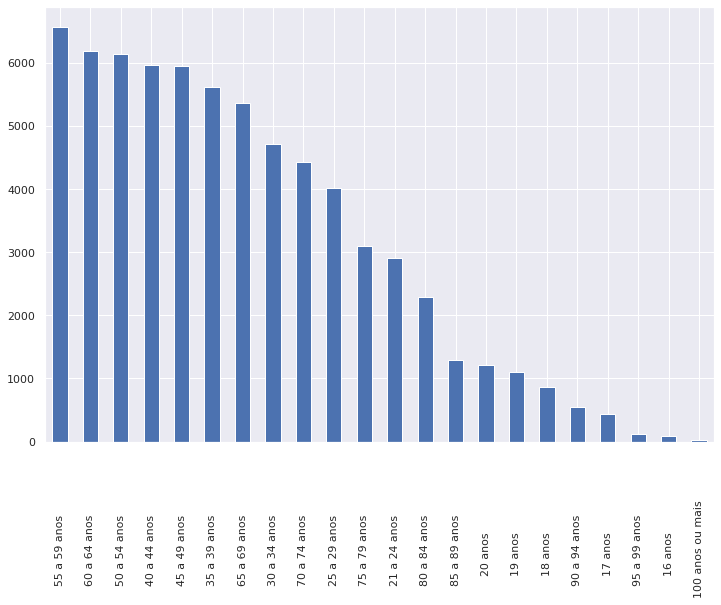

In [ ]:
# Distribuição gráfica de eleitores por faixa etária em ordem decrescente

eleitor_SCS_2020['DS_FAIXA_ETARIA'].value_counts().plot(kind='bar',figsize=(12,8));

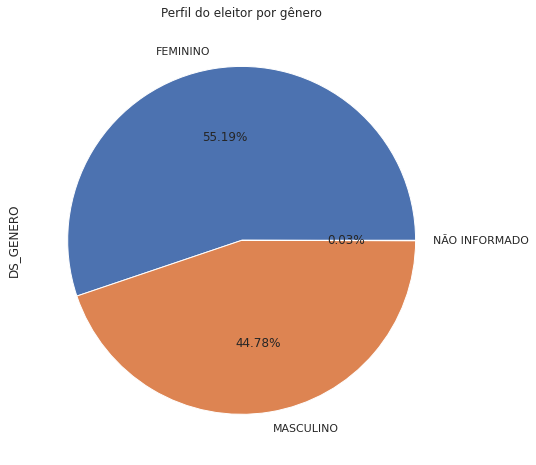

In [ ]:
# Distribuição gráfica do eleitorado por gênero

eleitor_SCS_2020['DS_GENERO'].value_counts().plot(kind='pie', autopct='%1.2f%%', title= 'Perfil do eleitor por gênero', figsize=(8,8));

In [ ]:
# Distribuição percentual do eleitorado feminino por grau de escolaridade em ordem decrescente

eleitor_SCS_2020[eleitor_SCS_2020['DS_GENERO'] == 'FEMININO'] ['DS_GRAU_ESCOLARIDADE'].value_counts(normalize=True)*100

ENSINO MÉDIO COMPLETO            24.792823
SUPERIOR COMPLETO                24.542895
ENSINO FUNDAMENTAL INCOMPLETO    15.482360
ENSINO FUNDAMENTAL COMPLETO      10.944200
SUPERIOR INCOMPLETO              10.781090
ENSINO MÉDIO INCOMPLETO          10.052353
LÊ E ESCREVE                      2.970193
ANALFABETO                        0.434085
Name: DS_GRAU_ESCOLARIDADE, dtype: float64

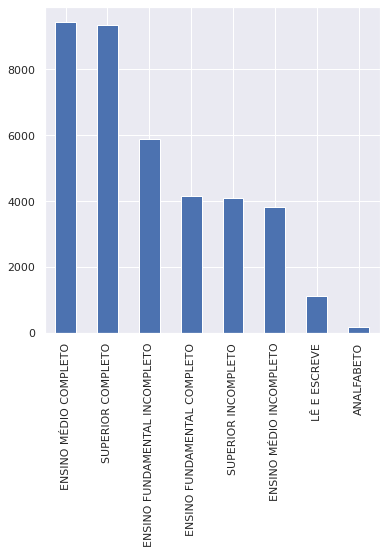

In [ ]:
eleitor_SCS_2020[eleitor_SCS_2020['DS_GENERO'] == 'FEMININO'] ['DS_GRAU_ESCOLARIDADE'].value_counts().plot(kind='bar',figsize=(6,6));

In [ ]:
# Distribuição percentual do eleitorado masculino por grau de escolaridade em ordem decrescente

eleitor_SCS_2020[eleitor_SCS_2020['DS_GENERO'] == 'MASCULINO'] ['DS_GRAU_ESCOLARIDADE'].value_counts(normalize=True)*100

SUPERIOR COMPLETO                24.844378
ENSINO MÉDIO COMPLETO            24.335365
ENSINO FUNDAMENTAL INCOMPLETO    13.678511
SUPERIOR INCOMPLETO              12.427052
ENSINO MÉDIO INCOMPLETO          12.018545
ENSINO FUNDAMENTAL COMPLETO      10.504474
LÊ E ESCREVE                      1.851251
ANALFABETO                        0.340423
Name: DS_GRAU_ESCOLARIDADE, dtype: float64

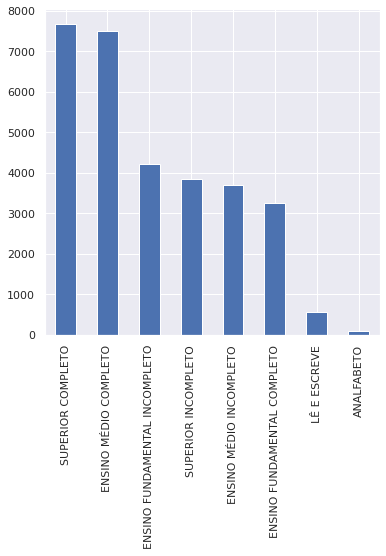

In [ ]:
eleitor_SCS_2020[eleitor_SCS_2020['DS_GENERO'] == 'MASCULINO'] ['DS_GRAU_ESCOLARIDADE'].value_counts().plot(kind='bar',figsize=(6,6));

In [ ]:
# Distribuição percentual por gênero de eleitores com grau de escolaridade declarado como SUPERIOR COMPLETO

eleitor_SCS_2020[eleitor_SCS_2020['DS_GRAU_ESCOLARIDADE'] == 'SUPERIOR COMPLETO'] ['DS_GENERO'].value_counts(normalize=True)*100

FEMININO     54.902307
MASCULINO    45.097693
Name: DS_GENERO, dtype: float64

In [ ]:
# Números absolutos por gênero de eleitores com grau de escolaridade declarado como SUPERIOR COMPLETO

eleitor_SCS_2020[eleitor_SCS_2020['DS_GRAU_ESCOLARIDADE'] == 'SUPERIOR COMPLETO'] ['DS_GENERO'].value_counts()

FEMININO     9329
MASCULINO    7663
Name: DS_GENERO, dtype: int64

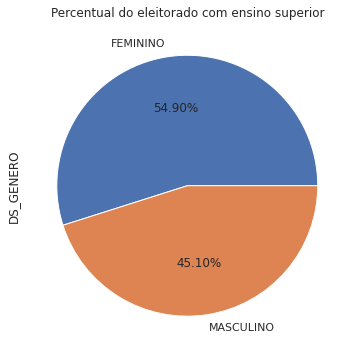

In [ ]:
# Distribuição gráfica por gênero de eleitores com grau de escolaridade declarado como SUPERIOR COMPLETO

eleitor_SCS_2020[eleitor_SCS_2020['DS_GRAU_ESCOLARIDADE'] == 'SUPERIOR COMPLETO'] ['DS_GENERO'].value_counts(normalize=True).plot(kind='pie', autopct='%1.2f%%',title='Percentual do eleitorado com ensino superior', figsize=(6,6));

O eleitorado do munícipio de São Caetano do Sul tem uma concentração maior de pessoas na faixa etária dos 50 aos 65 anos, sendo estes grupos os com maior prevalência dentre aqueles aptos ao voto. O número de mulheres é maior, representando quase 55% do eleitorado, contra 45% de homens.

# Análise sobre os dados de abstenções dos anos de 2016 e 2018

---




## Importando os Datasets

---
Datasets coletados no site do TSE, referentes aos pleitos de 2016 e 2018.


In [ ]:
abstencao_2016 = pd.read_csv('/content/drive/My Drive/perfil_comparecimento_abstencao_2016.csv', sep=';', encoding='iso-8859-1')

In [ ]:
abstencao_2018 = pd.read_csv('/content/drive/My Drive/perfil_comparecimento_abstencao_2018.csv', sep=';', encoding='iso-8859-1')

# Modelagem do Dataset

---


In [ ]:
abstencao_2016 = abstencao_2016.filter(items = ['NM_MUNICIPIO', 'NR_ZONA', 'DS_GENERO', 'DS_ESTADO_CIVIL', 'DS_FAIXA_ETARIA', 'DS_GRAU_ESCOLARIDADE' ])

abstencao_2016_SCS = abstencao_2016[abstencao_2016['NM_MUNICIPIO'] == 'SÃO CAETANO DO SUL']

abstencao_2016_SCS = abstencao_2016_SCS.filter (items= ['NR_ZONA','DS_GENERO', 'DS_ESTADO_CIVIL', 'DS_FAIXA_ETARIA', 'DS_GRAU_ESCOLARIDADE' ])

In [ ]:
abstencao_2016_SCS.sample(3)

,NR_ZONA,DS_GENERO,DS_ESTADO_CIVIL,DS_FAIXA_ETARIA,DS_GRAU_ESCOLARIDADE
1339950,166,FEMININO,DIVORCIADO,65 a 69 anos,SUPERIOR INCOMPLETO
1338534,166,FEMININO,SOLTEIRO,30 a 34 anos,ENSINO FUNDAMENTAL COMPLETO
3577476,269,FEMININO,SEPARADO JUDICIALMENTE,55 a 59 anos,SUPERIOR INCOMPLETO


In [ ]:
abstencao_2018 = abstencao_2018.filter(items = ['NM_MUNICIPIO', 'NR_ZONA', 'DS_GENERO', 'DS_ESTADO_CIVIL', 'DS_FAIXA_ETARIA', 'DS_GRAU_ESCOLARIDADE' ])

abstencao_2018_SCS = abstencao_2018[abstencao_2018['NM_MUNICIPIO'] == 'SÃO CAETANO DO SUL']

abstencao_2018_SCS = abstencao_2018_SCS.filter (items= ['NR_ZONA','DS_GENERO', 'DS_ESTADO_CIVIL', 'DS_FAIXA_ETARIA', 'DS_GRAU_ESCOLARIDADE' ])

In [ ]:
abstencao_2016_SCS.sample(3)

,NR_ZONA,DS_GENERO,DS_ESTADO_CIVIL,DS_FAIXA_ETARIA,DS_GRAU_ESCOLARIDADE
1339939,166,FEMININO,SEPARADO JUDICIALMENTE,85 a 89 anos,ENSINO MÉDIO COMPLETO
1494711,166,FEMININO,DIVORCIADO,60 a 64 anos,ENSINO FUNDAMENTAL INCOMPLETO
1388164,269,FEMININO,CASADO,75 a 79 anos,ENSINO FUNDAMENTAL INCOMPLETO


In [ ]:
df = {
      '2016' : [1880],
      
       '2018': [3856]
    
}
df = pd.DataFrame(df)
df          

,2016,2018
0,1880,3856


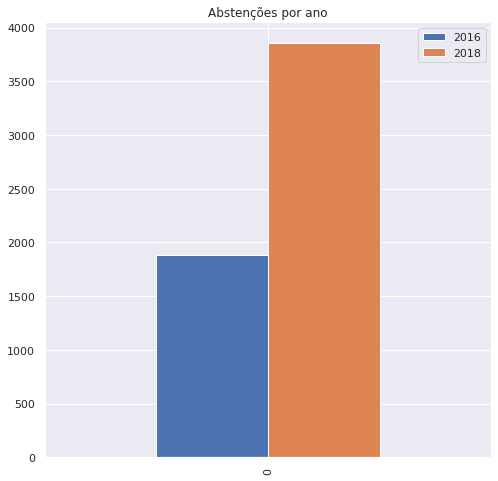

In [ ]:
df.plot(kind='bar',title='Abstenções por ano', figsize=(8,8));

Pode-se observar um aumento significativo do número de abstenções se compararmos as eleições municipais de 2016 para o primeiro turno das eleições de 2018 na cidade de São Caetano do Sul. O número saltou de 1880 para 3856, um aumento de mais de 105%. Deve-se ressaltar que em 2018 houve segundo turno para eleições presidenciais e estaduais e esse aumento, apesar de significativo, é entendível pelo pressuposto da recorrência da abstenção.

# Hipóteses

---

Iremos observar os números de abstenções sobre as categorias: Zona eleitoral, gênero, faixa etaria e escolaridade.

### Quem mais se abstém, homens ou mulheres?

In [ ]:
# Abstenção por gênero (2016)

abstencao_2016_scs['DS_GENERO'].value_counts(normalize=True)*100 


FEMININO         52.446809
MASCULINO        46.329787
NÃO INFORMADO     1.223404
Name: DS_GENERO, dtype: float64

In [ ]:
# Abstenção por gênero (2018)

abstencao_2018_scs['DS_GENERO'].value_counts(normalize=True)*100 

FEMININO         52.385892
MASCULINO        46.732365
NÃO INFORMADO     0.881743
Name: DS_GENERO, dtype: float64

Há uma tendência que se manteve nos dois pleitos, mulheres se abstém um pouco mais que os homens, 52% contra 46% em ambas as eleições.

---





# Como essas abstenções se distribuem pelas zonas eleitorais?

In [ ]:
# Abstenção por zona eleitoral (2016)

abstencao_2016_scs['NR_ZONA'].value_counts(normalize=True)*100 

269    50.37234
166    49.62766
Name: NR_ZONA, dtype: float64

In [ ]:
# Abstenção por zona eleitoral (2018)

abstencao_2018_scs['NR_ZONA'].value_counts(normalize=True)*100

269    50.103734
166    49.896266
Name: NR_ZONA, dtype: float64

A diferença de abstenções entre as duas zonas eleitorais da cidade é muito pequena e portanto irrelevante.

---



# Quem trai mais nossa democracia?

In [ ]:
# Abstenções por estado civil (2016)

abstencao_2016_scs['DS_ESTADO_CIVIL'].value_counts(normalize=True)*100 

SOLTEIRO                  28.244681
CASADO                    24.893617
DIVORCIADO                15.638298
VIÚVO                     14.787234
SEPARADO JUDICIALMENTE    14.627660
NÃO INFORMADO              1.808511
Name: DS_ESTADO_CIVIL, dtype: float64

In [ ]:
# Abstenções por estado civil (2018)

abstencao_2018_scs['DS_ESTADO_CIVIL'].value_counts(normalize=True)*100 

SOLTEIRO                  28.423237
CASADO                    25.051867
DIVORCIADO                15.819502
VIÚVO                     15.404564
SEPARADO JUDICIALMENTE    14.107884
NÃO INFORMADO              1.192946
Name: DS_ESTADO_CIVIL, dtype: float64

Solteiros traem mais nossa democracia. Em ambos os pleitos, registraram cerca de 28% dos que se abstém a votação.

---



# Qual a idade das pessoas que se abstém do voto?

In [ ]:
# Qual a idade das pessoas que se abstém do voto? (2016)

abstencao_2016_scs['DS_FAIXA_ETARIA'].value_counts(normalize=True)*100 

70 a 74 anos        7.978723
60 a 64 anos        7.925532
65 a 69 anos        7.925532
50 a 54 anos        7.659574
55 a 59 anos        7.606383
45 a 49 anos        7.234043
75 a 79 anos        7.234043
40 a 44 anos        6.542553
80 a 84 anos        6.382979
35 a 39 anos        5.585106
85 a 89 anos        5.531915
30 a 34 anos        5.159574
25 a 29 anos        3.882979
90 a 94 anos        3.244681
21 a 24 anos        2.712766
20 anos             1.436170
18 anos             1.436170
19 anos             1.276596
95 a 99 anos        1.170213
17 anos             1.063830
16 anos             0.744681
100 anos ou mais    0.265957
Name: DS_FAIXA_ETARIA, dtype: float64

In [ ]:
# Qual a idade das pessoas que se abstém do voto? (2016)

abstencao_2016_scs['DS_FAIXA_ETARIA'].value_counts()

70 a 74 anos        150
60 a 64 anos        149
65 a 69 anos        149
50 a 54 anos        144
55 a 59 anos        143
45 a 49 anos        136
75 a 79 anos        136
40 a 44 anos        123
80 a 84 anos        120
35 a 39 anos        105
85 a 89 anos        104
30 a 34 anos         97
25 a 29 anos         73
90 a 94 anos         61
21 a 24 anos         51
20 anos              27
18 anos              27
19 anos              24
95 a 99 anos         22
17 anos              20
16 anos              14
100 anos ou mais      5
Name: DS_FAIXA_ETARIA, dtype: int64

In [ ]:
# Qual a idade das pessoas que se abstém do voto? (2018)

abstencao_2018_scs['DS_FAIXA_ETARIA'].value_counts(normalize=True)*100 

70 a 74 anos        7.883817
65 a 69 anos        7.676349
55 a 59 anos        7.624481
60 a 64 anos        7.520747
75 a 79 anos        7.520747
50 a 54 anos        7.417012
45 a 49 anos        6.898340
80 a 84 anos        6.431535
40 a 44 anos        6.224066
35 a 39 anos        5.549793
85 a 89 anos        5.446058
30 a 34 anos        4.512448
90 a 94 anos        3.890041
25 a 29 anos        3.734440
21 a 24 anos        2.541494
20 anos             1.970954
95 a 99 anos        1.919087
19 anos             1.452282
18 anos             1.452282
17 anos             1.141079
16 anos             0.778008
100 anos ou mais    0.414938
Name: DS_FAIXA_ETARIA, dtype: float64

In [ ]:
# Qual a idade das pessoas que se abstém do voto? (2016)

abstencao_2018_scs['DS_FAIXA_ETARIA'].value_counts()

70 a 74 anos        304
65 a 69 anos        296
55 a 59 anos        294
60 a 64 anos        290
75 a 79 anos        290
50 a 54 anos        286
45 a 49 anos        266
80 a 84 anos        248
40 a 44 anos        240
35 a 39 anos        214
85 a 89 anos        210
30 a 34 anos        174
90 a 94 anos        150
25 a 29 anos        144
21 a 24 anos         98
20 anos              76
95 a 99 anos         74
19 anos              56
18 anos              56
17 anos              44
16 anos              30
100 anos ou mais     16
Name: DS_FAIXA_ETARIA, dtype: int64

Quando observamos o percentual e números totais de abstenções por faixa etária, verificamos que a distribuição coincide com distribuição etária dos eleitores da cidade, com uma concentração de casos para pessoas entre 40 e 79 anos.

---

